<a href="https://colab.research.google.com/github/rmahesh6386/Tata-Motors-Project-/blob/main/TATA_Motors_Stock_market_Forecasting_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Stock Market Analysis and Prediction of TATA Motors Pvt Ltd

## Stock Market Data From Yahoo Finance

### Introduction

   Stock Market Analysis and Prediction is the project on technical analysis, visualization and prediction using data provided by Yahoo Finance. By looking at data from the stock market of a technology giant like TATA motors. Used pandas to get stock information, visualize different aspects of it, and finally looked at a few ways of analyzing the risk of a stock, based on its previous performance history.
   
### Questions

In this analysis, I would like to explore the following questions.

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

In [36]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
# For reading stock data from yahoo
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [38]:
import pandas as pd
#df=pd.read_csv("TATAMOTORS.csv")
#df

In [39]:
#stock Company for analytics
stock = ['TATAMOTORS.NS']
data_source = 'yahoo' 

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-10,end.month,end.day)

# Set DataFrame as the Stock Ticker
TM = pdr.get_data_yahoo(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [40]:
Tatamotors=TM.dropna()

In [41]:
Tatamotors

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-07-16,234.979614,235.771118,226.174057,226.817154,220.263367,8741929
2012-07-17,229.439041,229.884262,222.859604,223.502716,217.044693,12015166
2012-07-18,221.375519,221.523941,216.082306,219.248337,216.751236,11897419
2012-07-19,222.117569,224.096344,221.424988,222.414383,219.881226,6677436
2012-07-20,221.622879,223.057480,219.693573,221.029236,218.511856,3940979
...,...,...,...,...,...,...
2022-07-08,436.250000,443.850006,429.299988,441.549988,441.549988,23730027
2022-07-11,438.049988,441.200012,433.450012,437.049988,437.049988,12619654
2022-07-12,433.000000,435.000000,428.149994,430.549988,430.549988,9518822


In [43]:
#Tatamotors.index=pd.to_datetime(Tatamotors.Date)
Tatamotors=Tatamotors["Close"]['2012-01-01':'2022-01-01']

In [44]:
Tatamotors

Date
2012-07-16    226.817154
2012-07-17    223.502716
2012-07-18    219.248337
2012-07-19    222.414383
2012-07-20    221.029236
                 ...    
2021-12-27    471.149994
2021-12-28    480.200012
2021-12-29    476.000000
2021-12-30    470.399994
2021-12-31    482.399994
Name: Close, Length: 2331, dtype: float64

In [45]:
Tatamotors.describe()

count    2331.000000
mean      331.777865
std       130.150446
min        65.300003
25%       231.699997
50%       334.399994
75%       436.699997
max       598.134399
Name: Close, dtype: float64

In [46]:
import plotly.express as px
import matplotlib.pyplot as plt
fig = px.line(Tatamotors, y="Close", title='Tatamotors closing price')
fig.show()

First, we need to check if a series is stationary or not because time series analysis only works with stationary data.

**ADF (Augmented Dickey-Fuller) Test**

Null Hypothesis: The series has a unit root (value of a =1)


Alternate Hypothesis: The series has no unit root.


If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.


If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

In [47]:
#So let's check for stationarity:
from statsmodels.tsa.stattools import adfuller
print("Results of dickey fuller test")
adft = adfuller(Tatamotors,autolag='AIC')

# output for dft will give us without defining what the values are.
#hence we manually write what values does it explains using a for loop

output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
for key,values in adft[4].items():
    output['critical value (%s)'%key] =  values
print(output)

#test_stationarity(df_close)

Results of dickey fuller test
Test Statistics                  -1.411273
p-value                           0.576860
No. of lags used                  0.000000
Number of observations used    2330.000000
critical value (1%)              -3.433160
critical value (5%)              -2.862781
critical value (10%)             -2.567431
dtype: float64


We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.


In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

<Figure size 432x288 with 0 Axes>

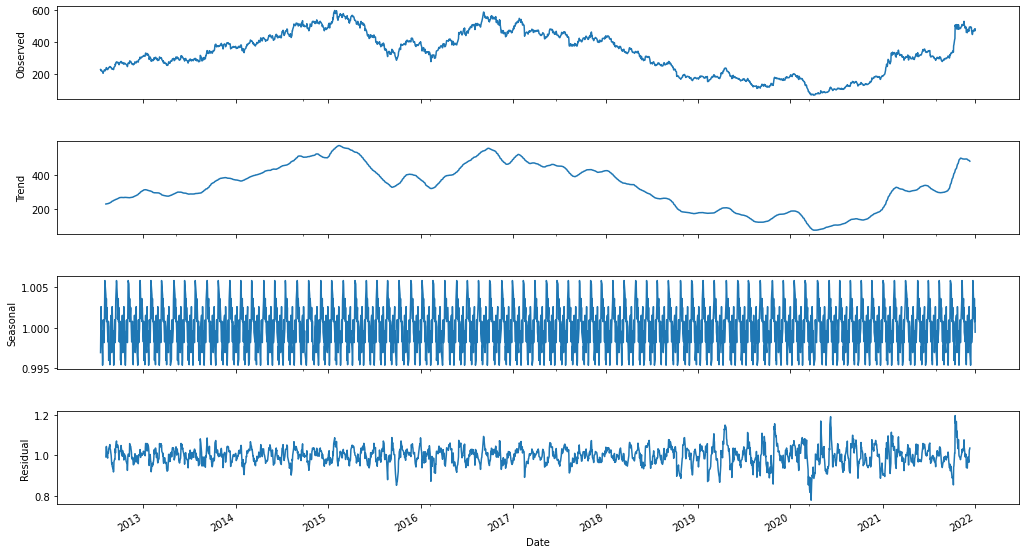

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(Tatamotors, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

We start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

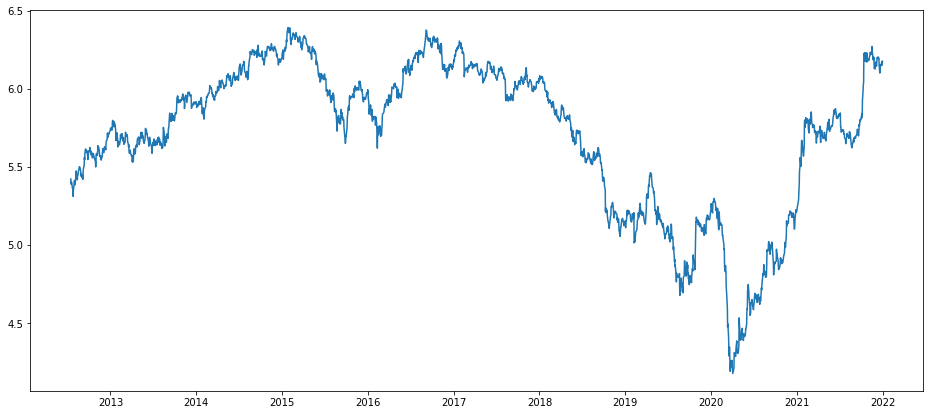

In [49]:
plt.figure(figsize=(16,7))
fig=plt.figure(1)

#USING LOG TRANSFORM
import numpy as np
ts_log=np.log(Tatamotors)
plt.plot(ts_log)

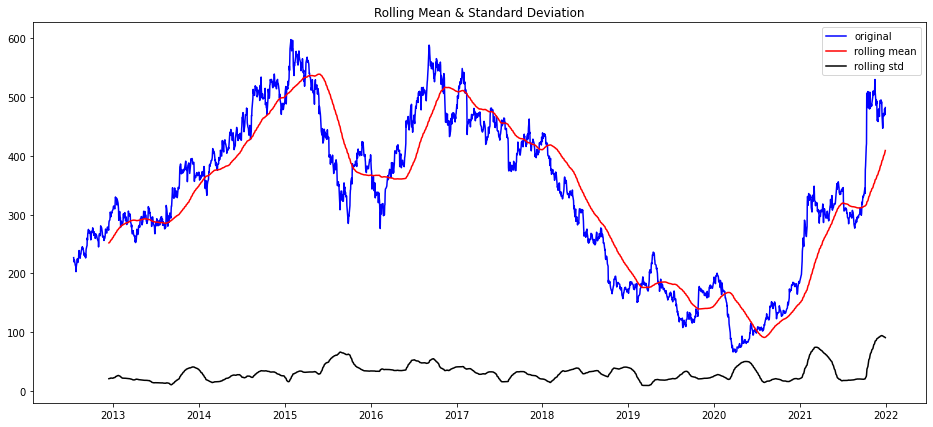

In [50]:
rollmean=Tatamotors.rolling(100).mean()
rollstd=Tatamotors.rolling(100).std()

plt.figure(figsize=(16,7))
fig=plt.figure(1)

#PLOT ROLLING sTATISTICS:
orig = plt.plot(Tatamotors,color = 'blue',label='original')
mean = plt.plot(rollmean,color = 'red',label = 'rolling mean')
std = plt.plot(rollstd,color = 'black',label = 'rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

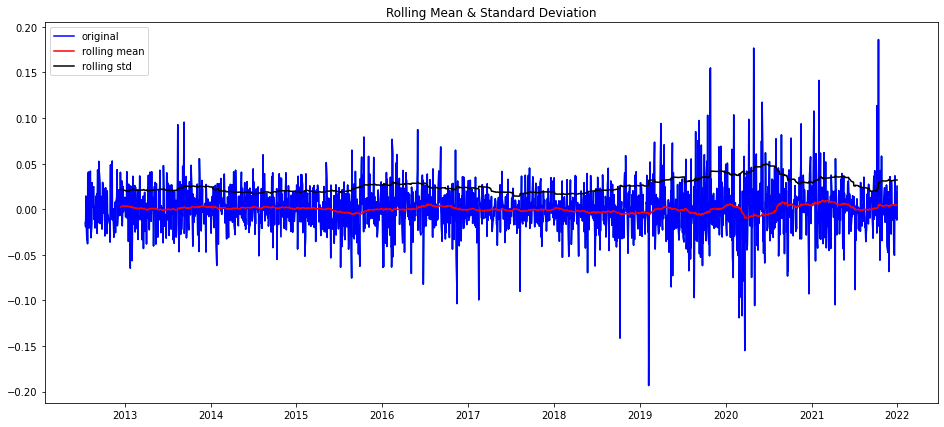

In [51]:
#Lets try Differencing
plt.figure(figsize=(16,7))
fig=plt.figure(1)
ts_log_diff=ts_log-ts_log.shift(periods=1, axis = 0)
plt.plot(ts_log_diff)

#Determining rolling statistics
rollmean = ts_log_diff.rolling(100).mean()
rollstd = ts_log_diff.rolling(100).std()

#plot rolling statistics
orig = plt.plot(ts_log_diff,color = 'blue',label='original')
mean = plt.plot(rollmean,color = 'red',label = 'rolling mean')
std = plt.plot(rollstd,color = 'black',label = 'rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

In [52]:
Tatamotors.sort_index(inplace=True)

In [53]:
Tatamotors

Date
2012-07-16    226.817154
2012-07-17    223.502716
2012-07-18    219.248337
2012-07-19    222.414383
2012-07-20    221.029236
                 ...    
2021-12-27    471.149994
2021-12-28    480.200012
2021-12-29    476.000000
2021-12-30    470.399994
2021-12-31    482.399994
Name: Close, Length: 2331, dtype: float64

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

In [ ]:
import statsmodels.api as sm
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(16,8))
model = ARIMA(ts_log, order=(0, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [ ]:
#Taking fitted values in Series
ARIMA_diff_predictions=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(ARIMA_diff_predictions.head())

In [ ]:
#Taking cumulative sum since we have differenced the timeseries
ARIMA_diff_predictions_cumsum=ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

In [ ]:
ARIMA_log_prediction=pd.Series(ts_log.iloc[0],index=ts_log.index)
ARIMA_log_prediction=ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

In [ ]:
plt.figure(figsize=(12,8))
predictions_ARIMA=np.exp(ARIMA_log_prediction)
plt.plot(Tatamotors)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-Tatamotors)**2)/len(Tatamotors)))